In [56]:
import numpy as np
from scipy.special import expi
import matplotlib.pyplot as plt

In [66]:
sigma = 1
alpha_omega = 0.1
f_omega = .3
N_omega = 137

x = np.linspace(-1, 1, 101)
z = np.linspace(0, 2, 201)
X, Z = np.meshgrid(x, z)

B = (-((1j * sigma + alpha_omega) ** 2) - f_omega**2) ** (1 / 2)
C = (1 / (N_omega**2) * (1j * sigma + alpha_omega) ** 2 + 1) ** (1 / 2)
B, C = np.complex128(B), np.complex128(C)
A = B / C

psi = np.zeros_like(Z, dtype=complex)

D = -2 * np.pi / (B**2 * 2 * 1j)

k = np.concatenate((np.arange(0,1,0.01), np.arange(1, 100, 0.1)))
m = k/A
chi = np.sign(np.imag(m))

for i in range(len(z)):
    for j in range(len(x)):
        I = (-1/(k/A+1j))*(np.exp(chi*m*1j*z[i])-np.exp(-z[i]))*np.exp(1j*k*x[j]) 
        # I = (-1/(k/A+1j))*(-np.exp(-z[i]))*np.exp(1j*k*x[j])
        # I = (-1/(k/A+1j))*(np.exp(chi*m*1j*z[i]))*np.exp(1j*k*x[j])
        psi[i, j] = np.trapezoid(I, k)
psi = psi * D

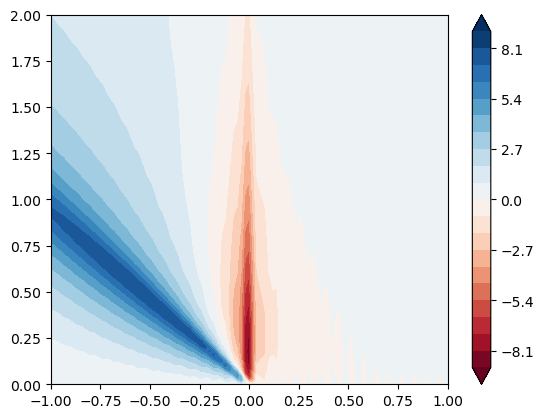

In [67]:
levels = np.linspace(-9, 9, 21)
t = np.pi/10 * 6
plt.contourf(X, Z, np.real(psi*np.exp(1j*t)), levels=levels, extend='both', cmap="RdBu")
plt.colorbar(extend='both')